# Homework 9
Data Science and Applied Machine Learning <br/>
Dr. Leslie Kerby \\
Student's name: Ziming Wang


**Question 1** <br/>
Import the MNIST Digits Dataset as shown in class. Put all 70k images in one container (no splitting the dataset).

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# not needed in Colab

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [ ]:
mnist['data'].shape

(70000, 784)

**Question 2: Unsupervised Learning** <br/>
Use k-means on the dataset (with k=10). Report the accuracy. 

*Hint: The method [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) may be useful for comparing the predicted k-means labels with the actual labels.*

**Note!** The cluster labels from kmeans will be arbitrary and therefore will not likely correspond to the digit numbers 0-9. This artifically makes the model seem poor. **Fix this by re-labeling the kmeans clusters to a representative digit number.** 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = mnist['data'], mnist['target']

In [ ]:
k = 10
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred

array([1, 6, 9, ..., 4, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 6, 9, ..., 4, 1, 0], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score

y_true = pd.to_numeric(y)
accuracy_score(y_true, kmeans.labels_)

0.09598571428571429

In [ ]:
# Fix the problem
dist = kmeans.transform(X)  # transform to cluster-distance space
dist

array([[2056.23789564, 1688.01201684, 2065.46816482, ..., 2154.92927981,
        2093.50286977, 2213.66484248],
       [2142.17460354, 1936.48021324, 2334.06163102, ..., 2360.80857573,
        2218.69108962, 2334.5256565 ],
       [2162.55186291, 2227.75884306, 2095.58369274, ..., 2183.18424599,
        2190.18359013, 1691.55432672],
       ...,
       [1953.81316402, 1757.21674585, 1759.5275896 , ..., 2006.43926826,
        2077.25136794, 2026.77951262],
       [2066.99125732, 1865.38172758, 2066.91743029, ..., 1935.31261687,
        2135.77164187, 2289.69364966],
       [1733.39766771, 2452.52979221, 2613.60372473, ..., 2717.54211858,
        2167.69753989, 2419.66451621]])

In [ ]:
dist.shape

(70000, 10)

In [ ]:
# Step 2:
cluster_pts = np.argmin(dist, axis=0) # axis=0 for col, axis=1 for row
# np.argmin returns the indices of the minimum values along an axis
cluster_pts # is the indices of nearest instance to each centroid

array([24963, 60448, 60471, 33368, 33977, 51837, 11354, 66276, 56465,
       45674])

In [ ]:
y[cluster_pts]

array(['6', '9', '9', '1', '7', '3', '0', '1', '2', '4'], dtype=object)

In [ ]:
kmeans.labels_[cluster_pts]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
# Step 3:
kmeans.labels_[cluster_pts]

for i in range(len(kmeans.labels_)):
  if 0==kmeans.labels_[i]:
    kmeans.labels_[i] = 6
  elif 1==kmeans.labels_[i]:
    kmeans.labels_[i] = 9
  elif 2==kmeans.labels_[i]:
    kmeans.labels_[i] = 9
  elif 3==kmeans.labels_[i]:
    kmeans.labels_[i] = 1
  elif 4==kmeans.labels_[i]:
    kmeans.labels_[i] = 7
  elif 5==kmeans.labels_[i]:
    kmeans.labels_[i] = 3
  elif 6==kmeans.labels_[i]:
    kmeans.labels_[i] = 0
  elif 7==kmeans.labels_[i]:
    kmeans.labels_[i] = 1
  elif 8==kmeans.labels_[i]:
    kmeans.labels_[i] = 2
  elif 9==kmeans.labels_[i]:
    kmeans.labels_[i] = 4

kmeans.labels_

array([9, 0, 4, ..., 7, 9, 6], dtype=int32)

In [ ]:
accuracy_score(y_true, kmeans.labels_)

0.5293571428571429

The accuracy of k-means is:  0.5697571428571429


**Question 3: More Unsupervised Learning**<br/>
Use t-SNE on the dataset to reduce the number of features to 2. Use kmeans on this feature-reduced dataset. Again report the accuracy. Graph the clusters with the t-SNE 2D feature space, according to k-means labels and the correct dataset labels.

*Hint: You may wish to use the TSNE-cuda package and run your notebook on GPUs. This runs MUCH faster.*

**Again** the kmeans cluster labels will likely not correspond to digit numbers; **fix this**.

**Graduate Students: Also run DBSCAN on your tSNE-reduced dataset and graph the clusters.**

In [ ]:
!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2
!cp -r site-packages/* /usr/local/lib/python3.6/dist-packages/

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


In [ ]:
!ln -s /content/lib/libfaiss.so $LD_LIBRARY_PATH/libfaiss.so

In [ ]:
from tsnecuda import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne

array([[-19.03726  ,   3.275629 ],
       [  1.7132231,  24.301298 ],
       [ 14.311642 ,  -2.294408 ],
       ...,
       [  5.988185 , -15.337407 ],
       [-25.093283 ,  -8.443679 ],
       [-30.355097 ,  12.968732 ]], dtype=float32)

In [ ]:
k = 10
kmeans = KMeans(n_clusters = k)
kmeans.fit(X_tsne)

y_pred = kmeans.predict(X_tsne)
y_pred

array([2, 6, 3, ..., 3, 2, 9], dtype=int32)

In [ ]:
kmeans.labels_

array([2, 6, 3, ..., 3, 2, 9], dtype=int32)

In [ ]:
# Wrong one
y_true = pd.to_numeric(y)
accuracy_score(y_true, y_pred)

0.0025428571428571427

In [ ]:
# Fix this problem
dist_xne = kmeans.transform(X_tsne)  # transform to cluster-distance space
dist_xne

array([[33.493065 , 36.918747 ,  4.848847 , ..., 15.2727995, 45.046722 ,
        10.755854 ],
       [48.35788  , 18.13027  , 34.378677 , ..., 36.16264  , 47.995045 ,
        26.047338 ],
       [25.8406   , 16.088266 , 37.07283  , ..., 26.19611  , 18.7353   ,
        39.67335  ],
       ...,
       [10.36821  , 30.805994 , 32.555813 , ..., 17.777077 , 14.240388 ,
        40.286945 ],
       [29.83992  , 47.00524  ,  8.858384 , ..., 14.299419 , 45.978966 ,
        22.259417 ],
       [48.08459  , 46.75148  , 14.997414 , ..., 29.843973 , 59.811626 ,
         8.342872 ]], dtype=float32)

In [ ]:
# Step 2:
cluster_pts = np.argmin(dist_xne, axis=0) # axis=0 for col, axis=1 for row
# np.argmin returns the indices of the minimum values along an axis
cluster_pts # is the indices of nearest instance to each centroid

array([65162, 33881, 25659, 55898, 69548, 30920,   359, 32102, 61646,
       37142])

In [ ]:
y[cluster_pts]

array(['7', '2', '5', '4', '3', '1', '0', '8', '1', '6'], dtype=object)

In [ ]:
kmeans.labels_[cluster_pts]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
# Step 3:
kmeans.labels_[cluster_pts]

for i in range(len(kmeans.labels_)):
  if 0==kmeans.labels_[i]:
    kmeans.labels_[i] = 7
  elif 1==kmeans.labels_[i]:
    kmeans.labels_[i] = 2
  elif 2==kmeans.labels_[i]:
    kmeans.labels_[i] = 5
  elif 3==kmeans.labels_[i]:
    kmeans.labels_[i] = 4
  elif 4==kmeans.labels_[i]:
    kmeans.labels_[i] = 3
  elif 5==kmeans.labels_[i]:
    kmeans.labels_[i] = 1
  elif 6==kmeans.labels_[i]:
    kmeans.labels_[i] = 0
  elif 7==kmeans.labels_[i]:
    kmeans.labels_[i] = 8
  elif 8==kmeans.labels_[i]:
    kmeans.labels_[i] = 1
  elif 9==kmeans.labels_[i]:
    kmeans.labels_[i] = 6

kmeans.labels_

array([5, 0, 4, ..., 4, 5, 6], dtype=int32)

In [ ]:
# Correct accuracy
accuracy_score(y_true, kmeans.labels_)

0.7944142857142857

The accuracy of k-means on t-SNE data for full dataset is:  0.8377285714285714


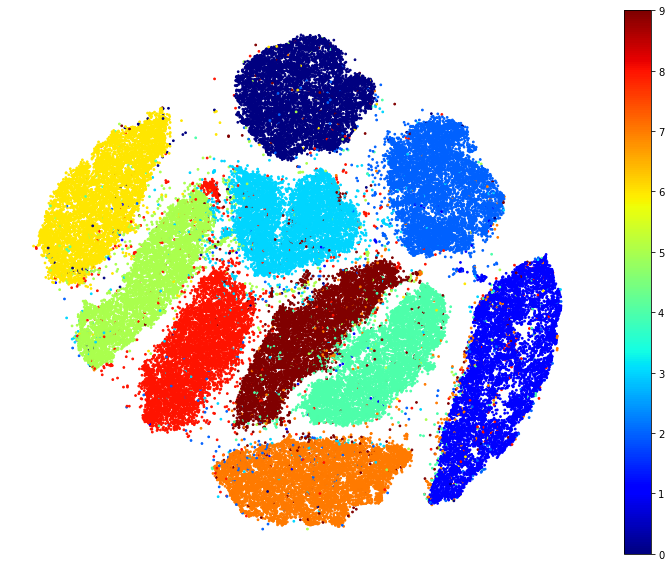

In [ ]:
# Graph Question
# Correct labels Graph
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y.astype(int), s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

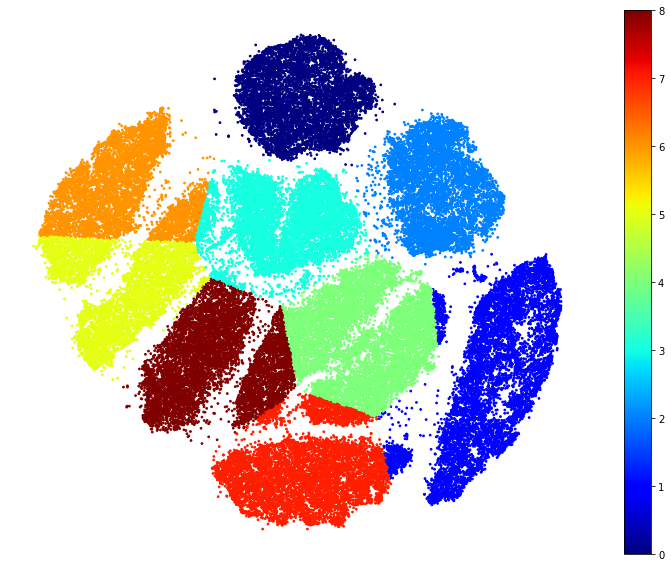

In [ ]:
# Kmeans labels Graph
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=kmeans.labels_.astype(int), s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

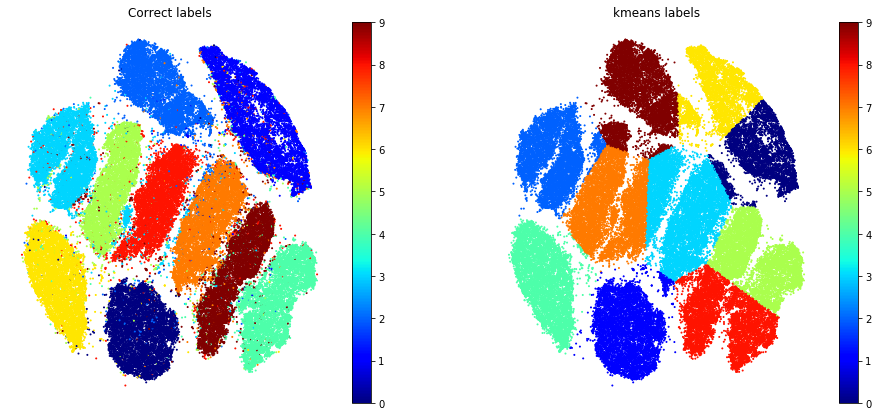

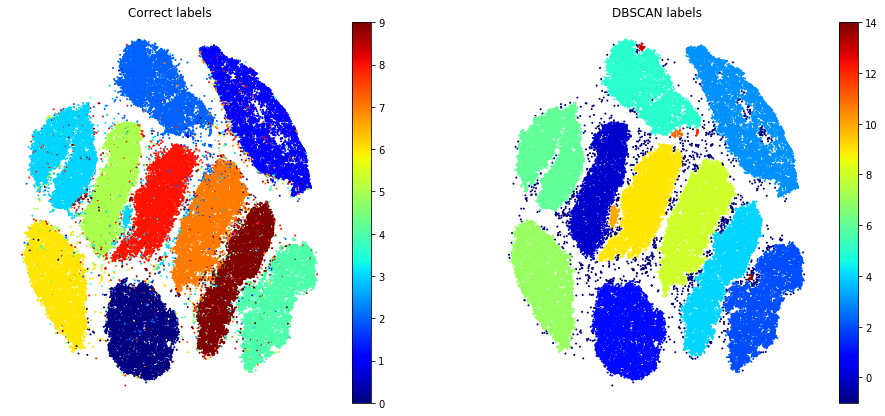